<a href="https://colab.research.google.com/github/Rickgoi/disaster-tweet-classification/blob/main/Notebooks/Deteccion_de_tweets_desastres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de Tweets de Desastres**




### **Estructura del Trabajo**

**Descripción del Problema de Negocio**

*  **Problema**: En la era de la información instantánea, las agencias de noticias, los servicios de emergencia y las organizaciones humanitarias monitorean constantemente las redes sociales como Twitter para detectar eventos importantes en tiempo real. Sin embargo, el lenguaje humano es ambiguo. Un tweet que dice "¡Se incendió la casa!" puede ser un reporte de un desastre real o una expresión metafórica.

*  **Necesidad del Negocio**: Existe la necesidad de un sistema automatizado que pueda filtrar rápidamente el "ruido" y distinguir los tweets que anuncian un desastre real de aquellos que no. Esto permitiría una respuesta más rápida y eficiente ante emergencias, salvando potencialmente vidas y recursos.



### **Objetivo General**

Construir y evaluar varios modelos de Machine Learning y Deep Learning para clasificar tweets en dos categorías: Desastre Real (1) o No Desastre (0), basándose únicamente en el contenido textual del tweet.



## **Origen de los Datos**

Los datos provienen de la competencia de Kaggle "Real or Not? NLP with Disaster Tweets" que a su vez provienen del notebook publico "NLP with Disaster Tweets - EDA and Cleaning data".

Link: https://www.kaggle.com/datasets/vbmokin/nlp-with-disaster-tweets-cleaning-data/data?select=train_data_cleaning2.csv

https://www.kaggle.com/code/vbmokin/nlp-with-disaster-tweets-eda-and-cleaning-data#5.-Save-and-visualization-of-cleaning-datasets




## **Definición de las Variables**

* **id**: Un identificador único para cada tweet. No es útil como característica para el modelo.

* **keyword**: Una palabra clave específica del tweet (puede estar en blanco). Podríamos explorarla para ver si aporta información.

* **location**: La ubicación desde donde se envió el tweet (puede estar en blanco y es poco consistente).

* **text**: Nuestra variable predictora principal (feature). Es el contenido textual del tweet.

* **target**: Nuestra variable objetivo (label). Es la que queremos predecir.

* **1**: El tweet corresponde a un desastre real.

* **0**: El tweet no corresponde a un desastre real.

**Librerías a Utilizar**

* pandas y numpy para manipulacion de los datos.

* re para limpieza de texto con expresiones regulares.

* matplotlib y seaborn para visualización de datos.

* nltk y/o spaCy para tareas de NLP como tokenización y eliminación de stopwords.

* wordcloud para generar las nubes de palabras.

* scikit-learn para vectorización (TF-IDF, BoW) y modelos de Machine Learning.

* tensorflow y keras para los modelos de Deep Learning.

# **FASE 1: Análisis Exploratorio de Datos (EDA) y Preprocesamiento Inicial**
Vamos a "conocer" nuestro conjunto de datos. Esta fase es crucial para tomar decisiones informadas más adelante.



In [ ]:
# Importamos las librerias necesarias
# Para la manipulación de datos.
import pandas as pd
import numpy as np
# Para limpieza de texto con expresiones regulares.
import re
# Para visualización de datos.
import matplotlib.pyplot as plt
import seaborn as sns
# Para generación de nubes de palabras.
from wordcloud import WordCloud

# Configuración para visualizaciones
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (10, 6)



In [ ]:
from google.colab import  files
from google.colab import drive
drive.mount ("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar el conjunto de datos
df_tweets= pd.read_csv("/content/drive/MyDrive/Curso DS 3/Proyecto_Final_DSIII/train_data_cleaning2.csv", encoding='latin-1')
df_tweets


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@ Aria Ahrary @ TheTawniest The out of contr...,1
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 UTC ] ? 5km S of Volcano H...,1
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1


--- Información General del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
--- Primeras 5 filas ---
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this  # earthquake...   
1   4     NaN      NaN           Forest fire near La Ronge Sask .  Canada   
2   5     NaN      NaN  All residents asked to  ' shelter in place '  ...   
3   6     NaN      NaN  13,000 people receive  # wildfires evacuation ...   
4   7     NaN      NaN  Just got sent this photo from Ruby  # Alaska a...   

   target  
0       1  
1       1  
2       1  


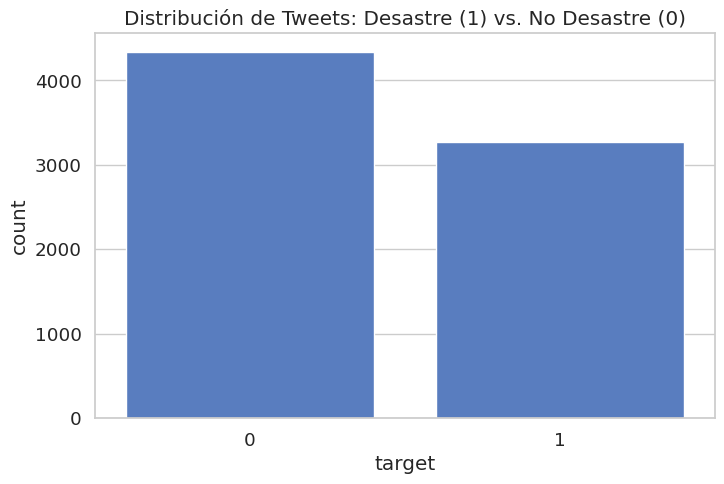

In [ ]:
# Inspección básica
print("--- Información General del Dataset ---")
df_tweets.info()

print("--- Primeras 5 filas ---")
print(df_tweets.head())

print("--- Conteo de Valores Nulos por Columna ---")
print(df_tweets.isnull().sum())

# Análisis de la variable 'target'
print("--- Distribución de la Variable Target ---")
print(df_tweets['target'].value_counts())

# Graficamos la distribución del target
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df_tweets)
plt.title('Distribución de Tweets: Desastre (1) vs. No Desastre (0)')
plt.show()

Ahora analizaremos la longitud de los tweets, para ello se creara una nueva columna que contenga la longitud de cada tweet. Luego, se creara un histograma para ver la distribución de longitudes. El objetivo es tratar de identificar si existe alguna diferencia notable en la longitud promedio de los tweets de desastre vs. los que no lo son.




In [ ]:
# Análisis de la longitud del texto de los tweets
df_tweets['text_length'] = df_tweets['text'].apply(len)
df_tweets

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1,71
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,40
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1,139
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1,67
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1,92
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,61
7609,10870,NaN,NaN,@ Aria Ahrary @ TheTawniest The out of contr...,1,133
7610,10871,NaN,NaN,M1 . 94 [ 01 : 04 UTC ] ? 5km S of Volcano H...,1,55
7611,10872,NaN,NaN,Police investigating after an e - bike collide...,1,147


<Axes: xlabel='text_length', ylabel='Count'>

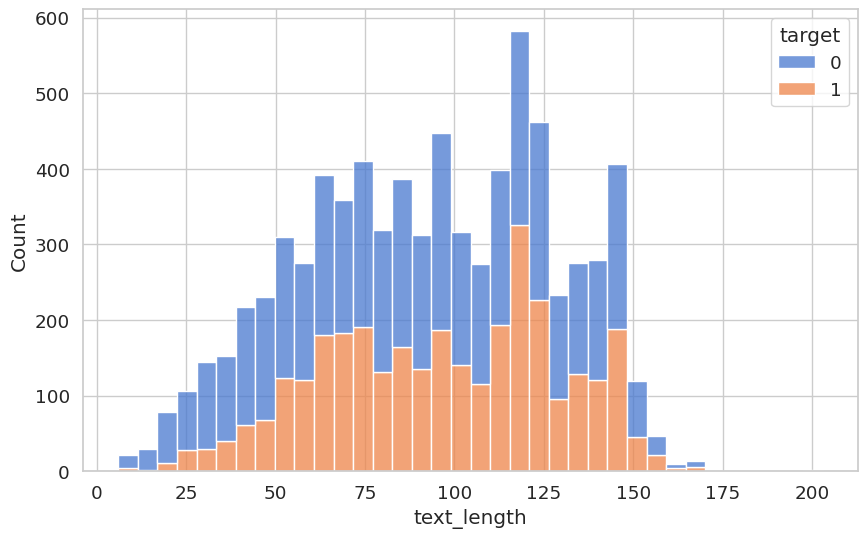

In [ ]:
# Graficamos la distribución de la longitud del texto
sns.histplot(data=df_tweets, x='text_length', hue='target', multiple='stack')

Continuamos avanzamos con un Nube de Palabras (Word Clouds).
Separamos el texto de los tweets de desastre (target == 1) del de los que no lo son (target == 0).
Cada grupo tendra su propia nube de palabras y con eso tendremos una idea visual muy rápida de las palabras más comunes en cada categoría.

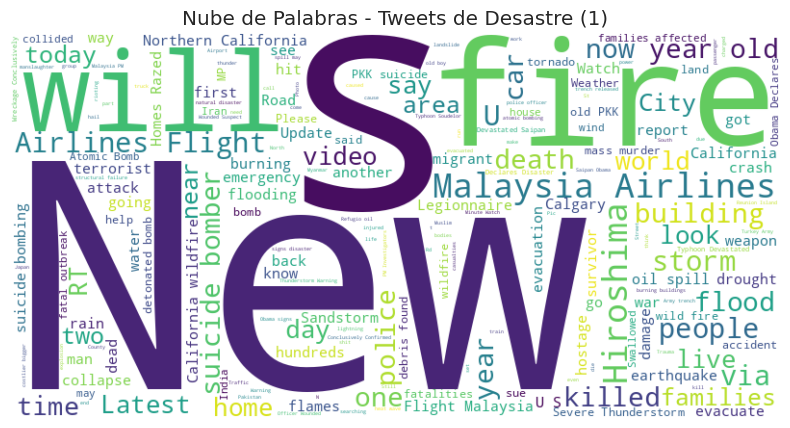

In [ ]:
# Para tweets de desastre real
text_disaster = ' '.join(df_tweets[df_tweets['target'] == 1]['text'])
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(text_disaster)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Tweets de Desastre (1)')
plt.show()



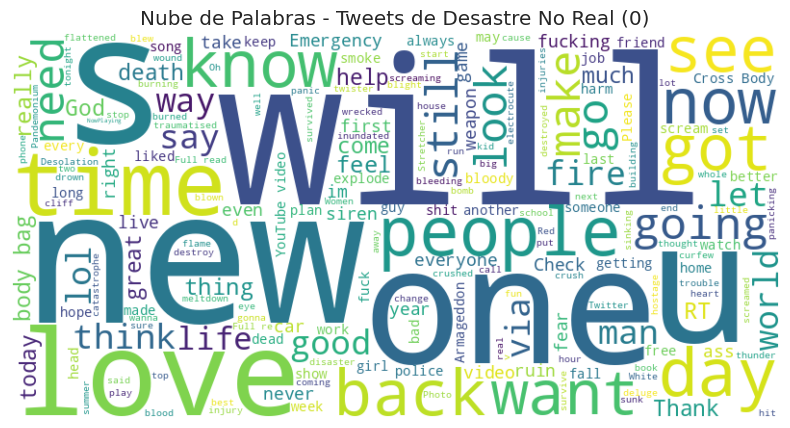

In [ ]:
# Para tweets de desastre no reales
text_disaster = ' '.join(df_tweets[df_tweets['target'] == 0]['text'])
wordcloud_disaster = WordCloud(width=800, height=400, background_color='white').generate(text_disaster)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Tweets de Desastre No Real (0)')
plt.show()


### **Analisis y primeras conclusiones**

**Hay mas tweets de desastres no reales (0) que tweets de desastre real (1)**

Observamos que el target=0 tiene 4342 instancias y target=1 tiene 3271. Esto significa que el dataset está ligeramente desbalanceado. No es un desbalance extremo, pero es algo que debemos tener en cuenta al evaluar nuestro modelo. Un modelo que siempre prediga "0" tendría una precisión (accuracy) del 57% (4342/7613) y el objetivo es superar ampliamente ese valor.

**La longitud de los tweets de desastres no reales son mas extensos del de los que son reales**

Se puede apreciar que los tweets de target=0 (no desastre) tienden a tener más caracteres, especialmente en el rango de 120-140 caracteres. Por otro lado, los tweets de desastre (target=1) parecen ser un poco más concisos y directos, con un pico más pronunciado alrededor de los 100 caracteres. Esto podría ser una señal de que los tweets de emergencia son más "al grano", caracteristica bastante util.


**Nube de Desastres (1)**

Palabras como fire, police, suicide, bomber, disaster, killed son muy prominentes. Claramente relacionadas con emergencias. También vemos http co, lo que nos indica la presencia de URLs, que habra que limpiar.

**Nube de No Desastres (0)**

Palabras como love, like, lol, new, day, know, time son dominantes. También aparece http co, confirmando que las URLs están en ambas clases. Palabras como body, bag, love pueden ser ambiguas (body bag puede ser una expresión de desastre o no). Esto resalta la importancia del contexto, algo que los modelos más avanzados (como los de Deep Learning) capturan mejor.

# **FASE 2: Preprocesamiento Profundo del Texto**

Ahora que tenemos un mayor conocimiento de los datos, debemos limpiarlo para que nuestros modelos puedan trabajar mejor. El objetivo es eliminar "ruido" y estandarizar el texto.

A continuacion los pasos que aplicaremos en esta fase:

1. Quitar símbolos, signos de puntuación y otros elementos no deseados (como URLs, hashtags, menciones).

2. Tokenizar.

3. Convertir a minúsculas.

4. Remover stopwords.

5. Lematización o Stemming.

6. **Análisis de N-gramas**: Veremos cuáles son las combinaciones de dos (bigramas) y tres (trigramas) palabras más comunes. Esto nos da más contexto que las palabras sueltas.

7. **Análisis de Sentimiento**: Asignaremos una puntuación de polaridad (negativo a positivo) a cada tweet para ver si hay una correlación entre el sentimiento y si un tweet es de desastre o no.

8. **Visualizaciones adicionales**: Crearemos gráficos de barras para mostrar los N-gramas más frecuentes.


In [ ]:
# Importamos librerías adicionales para NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Descargamos los recursos necesarios de NLTK (solo se necesita una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

--- Comparación de Texto Original vs. Texto Limpio ---
                                                                                                                                          text                                                                            cleaned_text
0                                                                      Our Deeds are the Reason of this  # earthquake May ALLAH Forgive us all                                              deed reason earthquake may allah forgive u
1                                                                                                     Forest fire near La Ronge Sask .  Canada                                                   forest fire near la ronge sask canada
2  All residents asked to  ' shelter in place '  are being notified by officers .  No other evacuation or shelter in place orders are expected   resident asked shelter place notified officer evacuation shelter place order expected
3                    

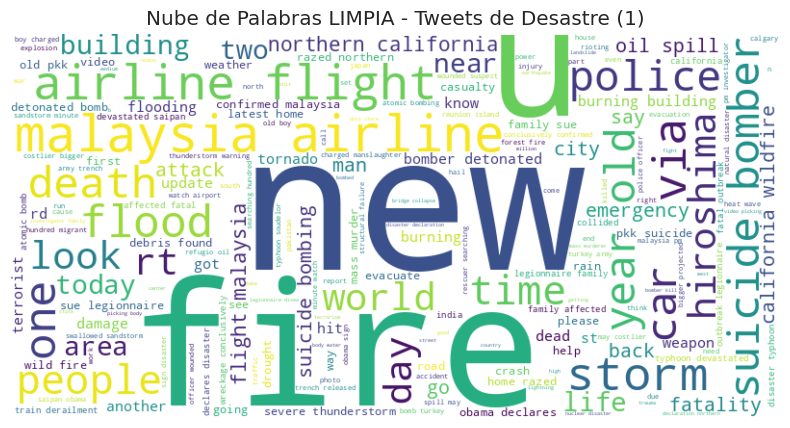

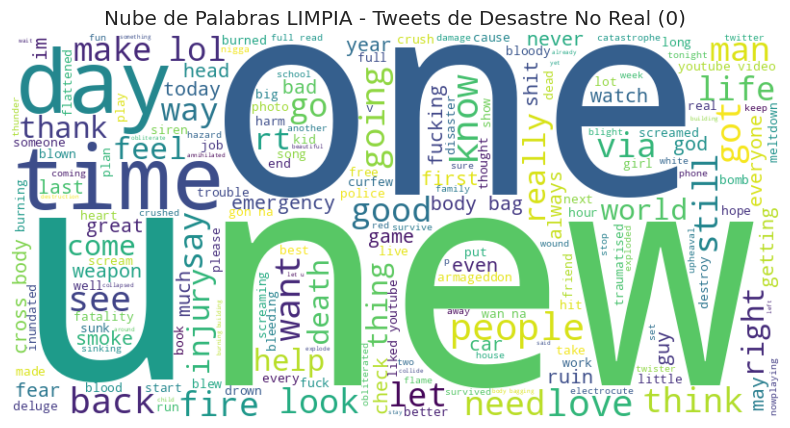

In [ ]:
# (Ya no necesitamos las líneas de nltk.download porque instalamos todo manualmente)
# Definimos la función para limpiar y preprocesar el texto
def clean_text(text):
    """
    Esta función toma un texto, lo limpia eliminando URLs, menciones, hashtags,
    puntuación y números. Luego lo convierte a minúsculas, lo tokeniza,
    elimina stopwords y aplica lematización.
    """
    # 1. Quitar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 2. Quitar etiquetas HTML (por si acaso hubiera alguna)
    text = re.sub(r'<.*?>', '', text)

    # 3. Quitar menciones (@usuario) y el símbolo de hashtag (#)
    text = re.sub(r'@\w+|#', '', text)

    # 4. Quitar caracteres no alfabéticos (puntuación, números, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 5. Convertir todo a minúsculas
    text = text.lower()

    # 6. Tokenización
    tokens = word_tokenize(text)

    # 7. Quitar stopwords (palabras comunes como 'a', 'the', 'is', etc.)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 8. Lematización (reducir palabras a su forma base, ej. 'running' -> 'run')
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Unimos los tokens limpios de nuevo en una sola cadena de texto
    return ' '.join(lemmatized_tokens)

# Aplicamos la función a la columna 'text' para crear una nueva columna 'cleaned_text'
df_tweets['cleaned_text'] = df_tweets['text'].apply(clean_text)

# Mostramos el resultado para comparar las primeras 10 filas
print("--- Comparación de Texto Original vs. Texto Limpio ---")
print(df_tweets[['text', 'cleaned_text']].head(10).to_string())
print("\n¡Preprocesamiento completado!")

# Visualización con Nubes de Palabras (usando el texto limpio)

# Nube de palabras para tweets de desastre real (target=1)
text_disaster_clean = ' '.join(df_tweets[df_tweets['target'] == 1]['cleaned_text'])
wordcloud_disaster_clean = WordCloud(width=800, height=400, background_color='white').generate(text_disaster_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_disaster_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras LIMPIA - Tweets de Desastre (1)')
plt.show()

# Nube de palabras para tweets de desastre no real (target=0)
text_no_disaster_clean = ' '.join(df_tweets[df_tweets['target'] == 0]['cleaned_text'])
wordcloud_no_disaster_clean = WordCloud(width=800, height=400, background_color='white').generate(text_no_disaster_clean)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_disaster_clean, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras LIMPIA - Tweets de Desastre No Real (0)')
plt.show()

### **Primeras conclusiones de la Fase 2: Preprocesamiento Profundo del Texto**

* **Conclusión 1**: Si miramos la tabla de "Texto Original vs. Texto Limpio", la diferencia es enorme. Se ha eliminado todo el "ruido" (hashtags, menciones, URLs, puntuación) y estandarizado el texto (minúsculas, lematización). Ahora los datos están en un formato perfecto para que los algoritmos puedan encontrar patrones.

* **Conclusión 2**: La palabra fire domina la nube de desastres, junto con otras como hiroshima, california, wildfire, storm, flood. Esto confirma que nuestro target=1 está fuertemente asociado con eventos de desastre. La aparición de malaysia y airline probablemente se deba a noticias sobre accidentes aéreos en el dataset.

* **Conclusion 3**: En la "Nube de No Desastres (0)", las palabras new, like, one, get, day, love, lol son ahora mucho más claras. La palabra bodybag (que ahora está unida por la lematización) sigue apareciendo, lo que demuestra que es un término que se usa metafóricamente.

### **Análisis de N-gramas**

Vamos a encontrar los bigramas (2 palabras) y trigramas (3 palabras) más comunes en los tweets de desastre y en los que no lo son.

/tmp/ipython-input-367893463.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=top_df, palette='viridis')


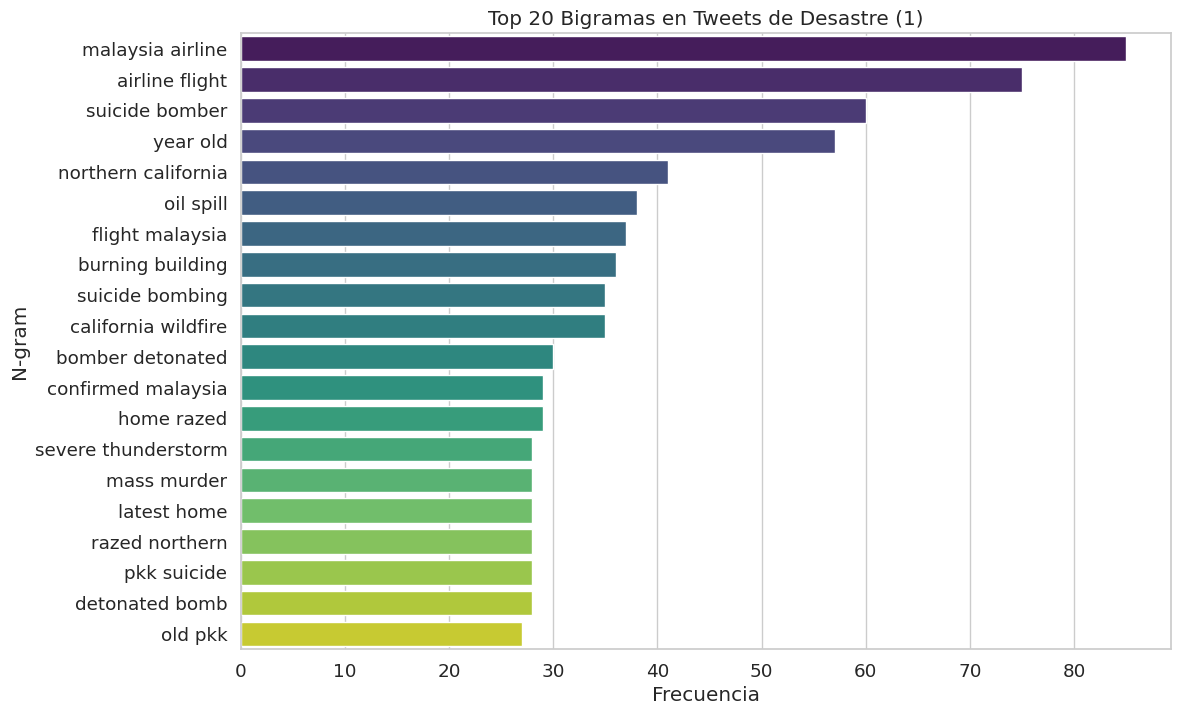

/tmp/ipython-input-367893463.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='N-gram', data=top_df, palette='viridis')


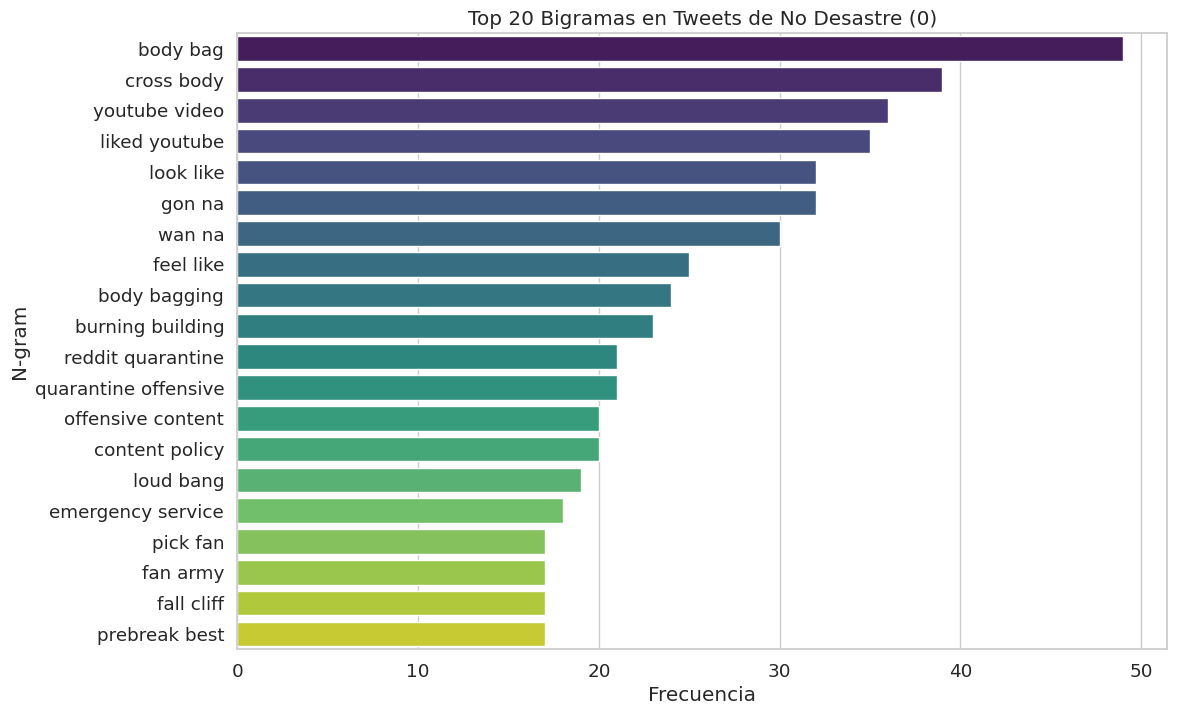

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, title, n=2, top_k=20):
    """
    Función para extraer y graficar los N-gramas más comunes.
    """
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

    top_df = pd.DataFrame(words_freq[:top_k], columns=['N-gram', 'Frecuencia'])

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frecuencia', y='N-gram', data=top_df, palette='viridis')
    plt.title(title)
    plt.show()

# Bigramas más comunes en tweets de DESASTRE
corpus_disaster = df_tweets[df_tweets['target'] == 1]['cleaned_text']
plot_top_ngrams(corpus_disaster, 'Top 20 Bigramas en Tweets de Desastre (1)', n=2)

# Bigramas más comunes en tweets de NO DESASTRE
corpus_no_disaster = df_tweets[df_tweets['target'] == 0]['cleaned_text']
plot_top_ngrams(corpus_no_disaster, 'Top 20 Bigramas en Tweets de No Desastre (0)', n=2)

# (Opcional) Trigramas
# plot_top_ngrams(corpus_disaster, 'Top 20 Trigramas en Tweets de Desastre (1)', n=3)
# plot_top_ngrams(corpus_no_disaster, 'Top 20 Trigramas en Tweets de No Desastre (0)', n=3)

### **Análisis de Sentimiento**

Vamos a usar la librería TextBlob, que es una forma muy sencilla de obtener una puntuación de polaridad para cada tweet. La polaridad va de -1.0 (muy negativo) a +1.0 (muy positivo).

                                         cleaned_text  polarity
0          deed reason earthquake may allah forgive u  0.000000
1               forest fire near la ronge sask canada  0.100000
2   resident asked shelter place notified officer ... -0.100000
3   people receive wildfire evacuation order calif...  0.000000
4   got sent photo ruby alaska smoke wildfire pour...  0.000000
5   rocky fire update california hwy closed direct... -0.112500
6   flood disaster heavy rain cause flash flooding... -0.200000
7                              top hill see fire wood  0.500000
8   emergency evacuation happening building across...  0.000000
9                          afraid tornado coming area -0.600000
10                    three people died heat wave far  0.100000
11  haha south tampa getting flooded hah wait seco...  0.112121
12  raining flooding florida tampabay tampa day lo...  0.000000
13                    flood bago myanmar arrived bago  0.000000
14         damage school bus multi car c

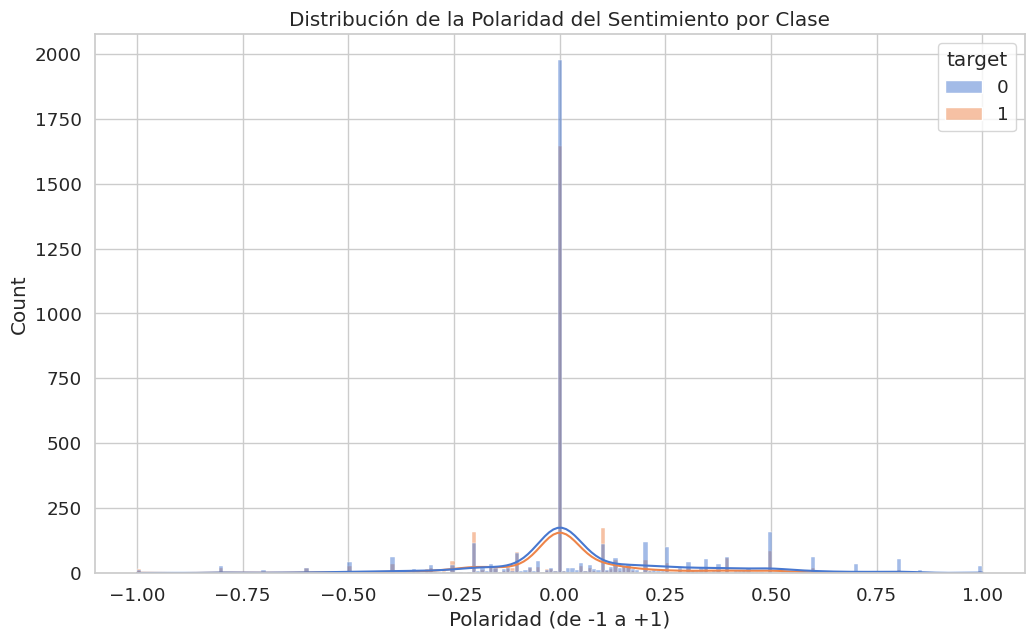

In [ ]:
from textblob import TextBlob

# Función para obtener la polaridad del sentimiento
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Aplicamos la función a nuestro texto limpio
df_tweets['polarity'] = df_tweets['cleaned_text'].apply(get_sentiment_polarity)

# Mostramos el resultado
print(df_tweets[['cleaned_text', 'polarity']].head(15))

# 3. Visualizamos la distribución del sentimiento para cada clase
plt.figure(figsize=(12, 7))
sns.histplot(data=df_tweets, x='polarity', hue='target', multiple='layer', kde=True)
plt.title('Distribución de la Polaridad del Sentimiento por Clase')
plt.xlabel('Polaridad (de -1 a +1)')
plt.show()

### **Ultimas conclusiones de la Fase 2: Preprocesamiento Profundo del Texto**

* **Conclusión 4 - N-gramas de Desastres Reales**: Combinaciones como malaysia airline, airline flight nos dan un claro indicio de una fuerte presencia de desastres aereos principalmente acerca de aquel caso real del vuelo polemico del Malaysia Airlines debido a que contiene muchos tweets sobre el desastre del vuelo. Otros bigramas como suicide bomber, oil spill, california wildfire y mass murder refuerzan la idea de que los bigramas son indicadores muy fuertes y específicos de desastres reales.

* **Conclusión 5 - N-gramas de No Desastres**: El bigrama body bag es el ejemplo perfecto de la ambigüedad del lenguaje. Aislado, podría ser un desastre, pero su alta frecuencia en target=0 demuestra su uso metafórico. Otros bigramas como youtube video, look like, cross body (probablemente de "cross-body bag", un tipo de bolso) son claramente de contexto no desastroso. El bigrama burning building también es interesante; podría ser el título de una canción, un meme, o una metáfora, mostrando de nuevo la complejidad del problema.

* **Conclusión 6 - Análisis de Sentimiento**: El pico en 0.0 (Neutro) es normal. Muchos tweets son informativos y no tienen una carga emocional fuerte (ej. "Police investigating after an e-bike collided with a car"). TextBlob los califica correctamente como neutros.

La distribución de target=0 (azul) tiene una "cola" derecha (positiva) mucho más pronunciada que la de target=1 (naranja). Esto significa que es mucho más probable que un tweet positivo no sea un desastre.

Curiosamente, las colas izquierdas (negativas) son bastante similares para ambas clases. Un tweet puede ser negativo tanto si es un desastre ("terrible tragedy") como si no lo es ("this is the worst movie ever").

**Conclusión final del sentimiento**:

La polaridad del sentimiento sí parece ser una característica útil, pero principalmente para identificar los tweets que NO son de desastre. Un sentimiento muy positivo es un fuerte indicador de target=0.

# **FASE 3: Vectorización y Modelo Baseline (Machine Learning Clásico)**

A partir de ahora vamos a convertir nuestras palabras limpias en números que un modelo de Machine Learning pueda entender con las sioguientesd indicaciones:

**Vectorizar**: Usaremos TF-IDF principalmente porque es mas potente que el Bag of Words y da más importancia a las palabras que son relevantes en un tweet pero no tan comunes en todos los tweets. Aun asi aplicaremos BoW para poder tener una compatariva en cuanto al rednimientos entre amobos.

**Entrenar un modelo sencillo**: Usaremos la Regresión Logística ya que es un modelo rápido, interpretable y un excelente punto de partida (nuestro modelo baseline).

In [ ]:
# Importamos las herramientas necesarias de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df_tweets.head()

,id,keyword,location,text,target,text_length,cleaned_text,polarity
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1,71,deed reason earthquake may allah forgive u,0.0
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1,40,forest fire near la ronge sask canada,0.1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1,139,resident asked shelter place notified officer ...,-0.1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1,67,people receive wildfire evacuation order calif...,0.0
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1,92,got sent photo ruby alaska smoke wildfire pour...,0.0


Tamaño del conjunto de entrenamiento: 6090
Tamaño del conjunto de prueba: 1523


--- Entrenando y Evaluando con TF-IDF ---
Dimensiones de la matriz TF-IDF de entrenamiento: (6090, 5000)

--- Reporte de Clasificación (TF-IDF) ---
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       869
           1       0.84      0.72      0.78       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.82      1523
weighted avg       0.82      0.82      0.82      1523


--- Matriz de Confusión (TF-IDF) ---


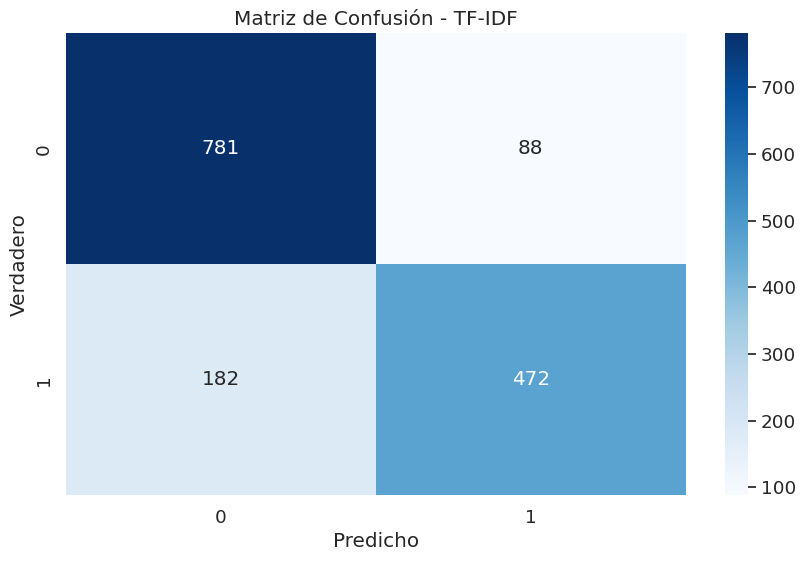



--- Entrenando y Evaluando con Bag of Words (BoW) ---
Dimensiones de la matriz BoW de entrenamiento: (6090, 5000)

--- Reporte de Clasificación (BoW) ---
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       869
           1       0.80      0.73      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523


--- Matriz de Confusión (BoW) ---


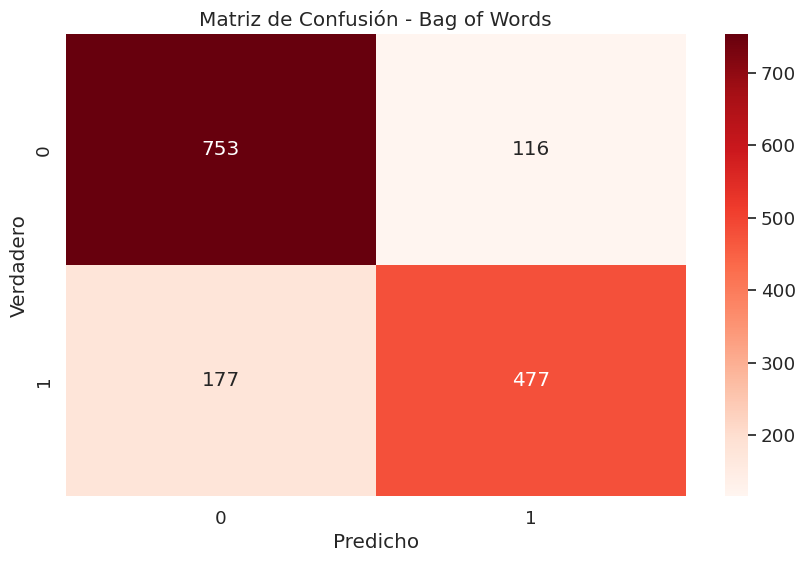

In [ ]:
# Importamos las herramientas necesarias de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df_tweets.head()


# 1. Preparamos los datos
X = df_tweets['cleaned_text']
y = df_tweets['target']

# 2. Dividimod los datos en conjuntos de entrenamiento y prueba (una sola vez)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")
print("\n" + "="*50 + "\n")


# MODELO 1: REGRESIÓN LOGÍSTICA CON TF-IDF
print("--- Entrenando y Evaluando con TF-IDF ---")

# 3a. Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(f"Dimensiones de la matriz TF-IDF de entrenamiento: {X_train_tfidf.shape}")

# 4a. Entrenar el modelo
log_reg_tfidf = LogisticRegression(max_iter=1000)
log_reg_tfidf.fit(X_train_tfidf, y_train)

# 5a. Evaluar el modelo
y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)

print("\n--- Reporte de Clasificación (TF-IDF) ---")
print(classification_report(y_test, y_pred_tfidf))

print("\n--- Matriz de Confusión (TF-IDF) ---")
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - TF-IDF')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

print("\n" + "="*50 + "\n")


# MODELO 2: REGRESIÓN LOGÍSTICA CON BAG OF WORDS (BoW)
print("--- Entrenando y Evaluando con Bag of Words (BoW) ---")

# 3b. Vectorización con BoW (usando CountVectorizer)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)
print(f"Dimensiones de la matriz BoW de entrenamiento: {X_train_bow.shape}")

# 4b. Entrenar el modelo
log_reg_bow = LogisticRegression(max_iter=1000)
log_reg_bow.fit(X_train_bow, y_train)

# 5b. Evaluar el modelo
y_pred_bow = log_reg_bow.predict(X_test_bow)

print("\n--- Reporte de Clasificación (BoW) ---")
print(classification_report(y_test, y_pred_bow))

print("\n--- Matriz de Confusión (BoW) ---")
cm_bow = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión - Bag of Words')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

### **Conclusiones de la Fase 3**

**Conclusion 1**:Bow logró identificar correctamente 5 desastres más que TF-IDF (477 vs 472), lo que se refleja en un Recall ligeramente mejor (0.73 vs 0.72) y 5 Falsos Negativos menos (177 vs 182). Aca notamos nuestro principal problema de negocio, los Falsos Negativos son los errores más costosos (un desastre que no se reporta), por lo que este es un punto a favor de BoW.

**Análisis adicional**: Sin embargo, BoW logró ese pequeño aumento en el recall a costa de cometer muchos más Falsos Positivos (116 vs 88). Es decir, generó 28 "falsas alarmas" más que TF-IDF. Esto afecta directamente su Precisión (0.80 vs 0.84), que es significativamente menor.

**Conclusión Final (el F1-score decide)**: El F1-score es la métrica perfecta para desempatar, ya que busca el equilibrio entre la precisión y el recall.

TF-IDF tiene un F1-score de 0.78.

BoW tiene un F1-score de 0.77.

Por lo tanto, aunque BoW fue un poco mejor encontrando desastres, lo hizo siendo mucho más "ruidoso". TF-IDF demostró ser un modelo más equilibrado y, en general, superior. Su capacidad para penalizar palabras demasiado comunes (como new, like, just) que no aportan mucho significado le da una ventaja.
Nuestro modelo baseline oficial será la Regresión Logística con TF-IDF, con una precisión del 81% y un F1-score para desastres de 0.78.

# **FASE 4: Modelado con Deep Learning**

Ahora construiremos un modelo de Deep Learning para intentar superar nuestro baseline. Siguiendo las indicaciones, usaremos Keras (a través de TensorFlow).

El flujo de trabajo será:

**Tokenizar y Secuenciar**: Convertir cada tweet en una secuencia de números enteros (cada número representa una palabra del vocabulario).

**Padding**: Asegurarnos de que todas las secuencias tengan la misma longitud.

**Construir el Modelo**: Usaremos una arquitectura común y efectiva para NLP:

 **- Capa de Embedding**: Aprenderá representaciones vectoriales de las palabras.

 **- Capa LSTM (Long Short-Term Memory)**: Una red neuronal recurrente ideal para procesar secuencias y capturar el contexto.

 **- Capa de Salida (Dense)**: Hará la clasificación final (0 o 1).

Entrenar y Evaluar.

In [ ]:
# Importamos las herramientas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping


Dimensiones de los datos de entrenamiento para DL: (6090, 150)

--- Resumen del Modelo LSTM ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo de Deep Learning...
Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 56s 648ms/step - accuracy: 0.5948 - loss: 0.6610 - val_accuracy: 0.7964 - val_loss: 0.4625
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 79s 613ms/step - accuracy: 0.8589 - loss: 0.3474 - val_accuracy: 0.8062 - val_loss: 0.4671
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 48s 616ms/step - accuracy: 0.9220 - loss: 0.2144 - val_accuracy: 0.7841 - val_loss: 0.5738
¡Modelo entrenado!

Evaluando el modelo de Deep Learning...
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step

--- Reporte de Clasificación (LSTM) ---
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       869
           1       0.80      0.74      0.77       654

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523


--- Matriz de Confusión (LSTM) ---


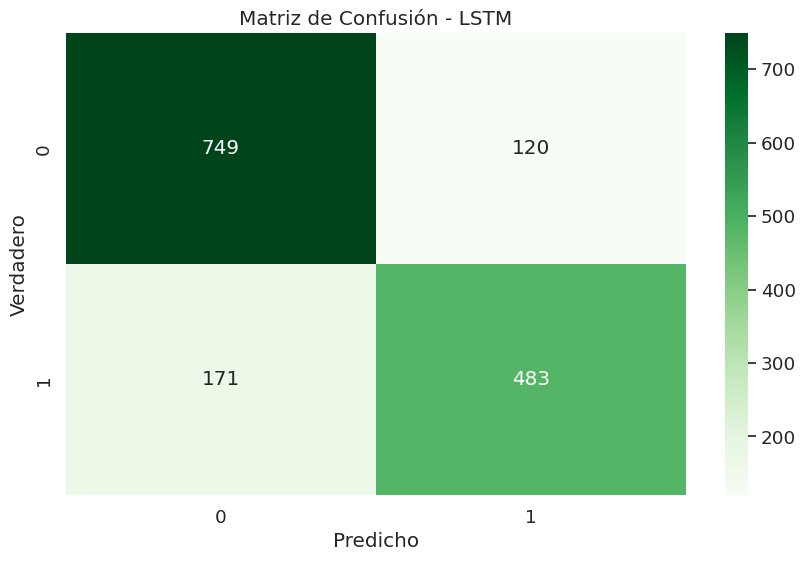

In [ ]:
# 1. Tokenización y Secuenciamiento
# Definimos el número máximo de palabras a considerar en nuestro vocabulario
MAX_WORDS = 10000
# Definimos la longitud máxima de nuestras secuencias (tweets)
MAX_LEN = 150

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(X_train)

# Convertimos los textos a secuencias de números
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 2. Padding
# Rellenamos las secuencias para que todas tengan la misma longitud
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN)

print(f"Dimensiones de los datos de entrenamiento para DL: {X_train_pad.shape}")

# 3. Construir el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN))
model_lstm.add(SpatialDropout1D(0.2)) # Capa de regularización para evitar overfitting
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid')) # Capa de salida para clasificación binaria

# Compilamos el modelo
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\n--- Resumen del Modelo LSTM ---")
model_lstm.summary()

# 4. Entrenar el modelo
print("\nEntrenando el modelo de Deep Learning...")
# Usaremos EarlyStopping para detener el entrenamiento si el modelo deja de mejorar
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model_lstm.fit(X_train_pad, y_train,
                         epochs=10,
                         batch_size=64,
                         validation_split=0.2, # Usamos parte de los datos de entrenamiento para validar en cada época
                         callbacks=[early_stopping])

print("¡Modelo entrenado!")

# 5. Evaluar el modelo de Deep Learning en el conjunto de prueba
print("\nEvaluando el modelo de Deep Learning...")
y_pred_lstm_prob = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)

print("\n--- Reporte de Clasificación (LSTM) ---")
print(classification_report(y_test, y_pred_lstm))

print("\n--- Matriz de Confusión (LSTM) ---")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - LSTM')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

### **Análisis Comparativo Final: ML Clásico vs. Deep Learning**

Vamos a poner los resultados de nuestro modelo clásico (Regresión Logística + TF-IDF) contra los del nuevo modelo (LSTM).

**Resultados de Regresión Logística + TF-IDF (Nuestro Baseline)**:

*   Accuracy: 82%

Reporte para Clase 1 (Desastre):
*   Precision: 0.84
*   Recall: 0.72
*   F1-Score: 0.78

Matriz de Confusión:
*   Verdaderos Positivos: 473
*   Falsos Negativos: 181

**Resultados del Modelo LSTM (Deep Learning)**:

*   Accuracy: 80%

Reporte para Clase 1 (Desastre):

*   Precision: 0.81
*   Recall: 0.70
*   F1-Score: 0.75

Matriz de Confusión:

*   Verdaderos Positivos: 459
*   Falsos Negativos: 195

# **Conclusiones Finales**

En este proyecto, se abordó el problema de clasificar tweets para determinar si reportan un desastre real o no. Se realizó un análisis exploratorio de datos (EDA) exhaustivo, seguido de la implementación y evaluación de tres modelos de clasificación: Regresión Logística con Bag of Words (BoW), Regresión Logística con TF-IDF y una Red Neuronal Recurrente (LSTM).

**1. Resultados Obtenidos**:

*   El modelo de Regresión Logística con vectorización TF-IDF emergió como el de mejor rendimiento entre los modelos, alcanzando una precisión (accuracy) global del 82% y un F1-score de 0.78 para la clase de desastres.

*   El modelo de Deep Learning (LSTM), a pesar de su mayor complejidad, obtuvo un rendimiento ligeramente inferior, con una precisión del 80% y un F1-score de 0.75 para la clase de desastres.

**2. Insights y Observaciones**:

*   **TF-IDF superó a BoW**: La técnica TF-IDF demostró ser más efectiva que el simple conteo de palabras (BoW). Esto sugiere que ponderar las palabras por su importancia relativa fue beneficioso, ayudando al modelo a enfocarse en términos más distintivos de desastres y reduciendo las "falsas alarmas" (mayor precisión).

*   **El modelo clásico superó al LSTM**: Sorprendentemente, en este caso, el modelo de Machine Learning clásico superó al modelo de Deep Learning. El modelo LSTM tuvo más Falsos Negativos (195 vs. 181), lo cual es el error más crítico para nuestro problema de negocio, ya que implica no detectar un desastre real.

*   **¿Por qué pudo pasar esto?** Hay varias razones posibles. Los modelos LSTM más simples a veces no superan a un TF-IDF bien ajustado en datasets de este tamaño. El rendimiento de los modelos de Deep Learning a menudo depende fuertemente del ajuste de hiperparámetros (tamaño del embedding, unidades LSTM, etc.), y nuestro modelo simple podría mejorarse con más experimentación. Además, para textos cortos como los tweets, la información contextual que un LSTM puede capturar podría no ser tan ventajosa como se esperaba.

**3. Recomendación de Negocio**:

Basado en los resultados, se recomienda implementar el modelo de Regresión Logística con TF-IDF. Ofrece el mejor equilibrio entre rendimiento (mayor F1-score) y eficiencia. Es un modelo más simple, más rápido de entrenar y más fácil de interpretar que el modelo LSTM, y en este caso, demostró ser más preciso.

**Perspectivas Futuras del Proyecto**

Este proyecto ha sentado una base sólida, pero existen varias vías para mejorar el rendimiento en el futuro:

1.   **Ingeniería de Características Adicional**: Podríamos incorporar como características la presencia de keywords específicas, el número de menciones, o incluso la polaridad del sentimiento que calculamos en el EDA.

2.   **Ajuste de Hiperparámetros**: Realizar una búsqueda sistemática de los mejores hiperparámetros tanto para TfidfVectorizer (ej. ngram_range, min_df) como para el modelo LSTM (ej. output_dim del embedding, número de unidades LSTM).

3.   **Modelos de Deep Learning más Avanzados (Transfer Learning)**: La mejora más prometedora sería utilizar un modelo de Transformer pre-entrenado como BERT (o una versión más ligera como DistilBERT). Estos modelos ya "entienden" el lenguaje gracias a su entrenamiento en enormes cantidades de texto y suelen ofrecer resultados de mayor calidad en tareas de clasificación de texto como esta, simplemente haciendo un fine-tuning sobre nuestro dataset.